In [1]:
using HDF5,PyPlot

In [2]:
arxnombre="/home/karel/BRWFiles/Facilitada/Completo_19115s1cut_single_event_preproc.h5"
arx=h5open(arxnombre)
elementos=names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [3]:
csdlind=read(arx["CSDALindenberg"])
lfp=read(arx["LFPSaturados"])
(alto,ancho,nmax)=size(csdlind)
sat=read(arx["CanalesMalos"])
numsatu=length(sat)
freq=read(arx["freq"])
#retrazo=Arxivo["retrazo"]
#KOp=Arxivo["KTT_KInv"];

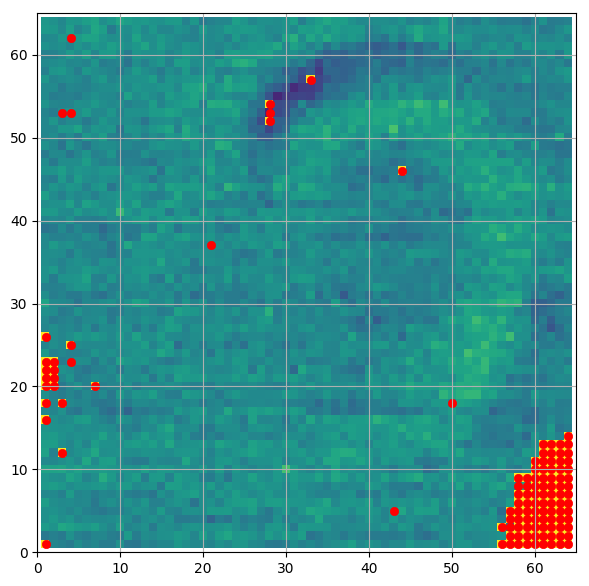

In [4]:
figure(figsize=(7,7))

xlim(0,65)
ylim(0,65)

nframe=1200
lfpframe=lfp[:,:,nframe]
vl=200
imshow(lfpframe, origin="lower", vmin=-vl, vmax=vl, extent=[0.5, 64.5, 0.5,64.5])

xx=sat[:,2]
yy=sat[:,1]
scatter(xx, yy, marker="o", color="red", lw=0.5)

grid()

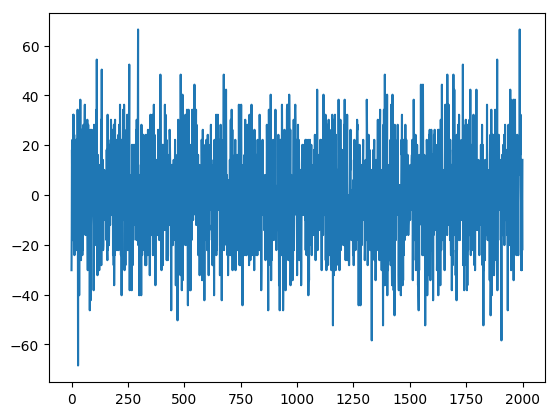

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff251d22630>

In [5]:
trazmalo=lfp[62, 5, :]
plot(trazmalo)

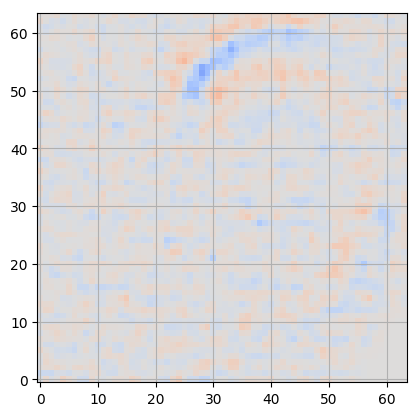

In [6]:
csdframe=csdlind[:,:,nframe]
vl=70
imshow(csdframe, origin="lower", vmin=-vl, vmax=vl, cmap="coolwarm")
grid()

In [7]:
nr=(52, 54, 56, 46)
nc=(28, 28, 33, 44)

nsat=size(sat)[1]

for q in 1:nsat
    (reng, colu)=(sat[q,1], sat[q,2])
    for (ren, col) in zip(nr, nc)
    testa = (ren, col) == (reng, col)
        if testa
            println(ren, " ", col, " estan detectados como malos")
        end
    end
end
    
    
#lfpejemplo=vec(lfp[nr,nc,:])
#csdejemplo=vec(csdlind[nr,nc,:]);

54 28 estan detectados como malos
46 44 estan detectados como malos
52 28 estan detectados como malos


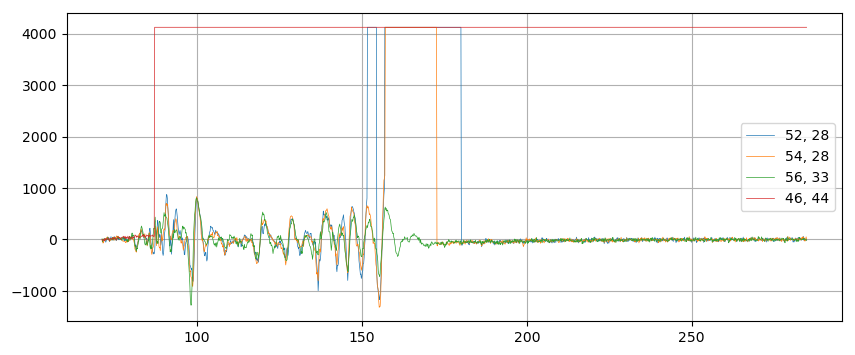

PyObject <matplotlib.legend.Legend object at 0x7f05ab5b6f98>

In [24]:
intervalo=500:2000
it=intervalo./freq
pp=figure(figsize=(10,4))

for (ren, col) in zip(nr, nc)
    lfpejemplo=vec(lfp[ren,col,:])
    #csdejemplo=vec(csdlind[ren,col,:]);
    plot(it, lfpejemplo[intervalo], lw=0.5, label="$ren, $col")
    #plot(it, csdejemplo[intervalo].*2.55, lw=0.35)
end
grid()
legend()

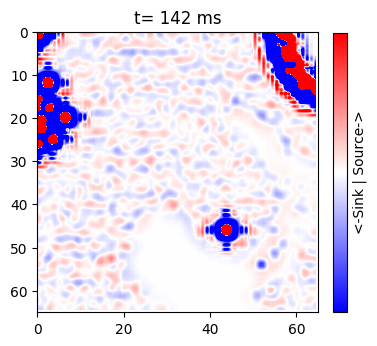

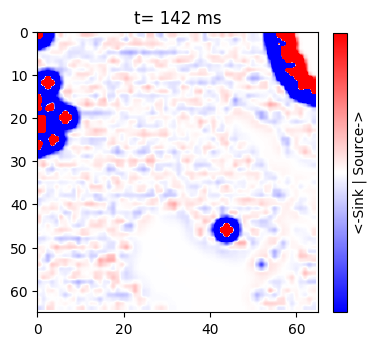

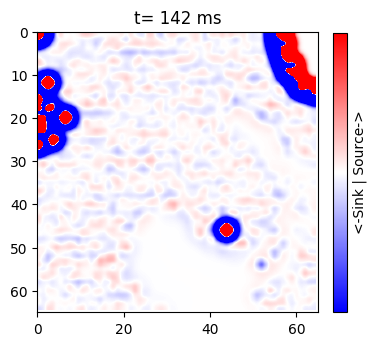

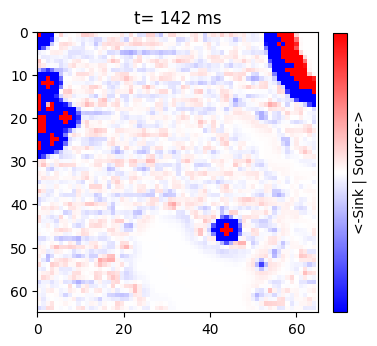

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[12]:32
└ @ Core ./In[12]:32


In [12]:
n=1000
#ion()
ioff()
lista=("sinc", "hanning", "gaussian", "nearest")
limites=50
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=csdlind[:,:,n]
    tiempo=round(Int,n/freq)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

In [13]:
extrema(csdlind)

(-2284.3835f0, 2744.6685f0)

In [14]:
t=140
#ion()
ioff()
lista=("sinc", "hanning", "gaussian", "nearest")
limites=10
for interpol in lista
figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD2[:,:,t]
    tiempo=round(Int,(t-retrazo2)/freq2)

tick_params(
    axis="both",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
   # bottom="off",      # ticks along the bottom edge are off
    top="off",
    right="off",
   # left="off",
# ticks along the top edge are off
   # labelbottom="off",
    labelleft="on")

    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation=interpol,
    cmap="bwr", 
                      vmin=-limites,vmax=limites, extent=[0,64.5,0.5,64.5])

cbx=colorbar(imagen, fraction=0.045, ticks=[]) 

cbx[:set_label]("<-Sink | Source->")
end

UndefVarError: UndefVarError: CSD2 not defined

In [ ]:
ioff()
limites=50
inicio=1009
retrazo=inicio
final=1500
paso=1
for t=inicio:paso:final
#t=954
    figura=figure(figsize=(4,4))
    xlim(0,65)
    ylim(65,0)

    ejemplo=CSD[:,:,t]
    tiempo=@sprintf("%3.2f",(t-retrazo)/freq);
    title("t= $tiempo ms")
    imagen=imshow((ejemplo), origin="lower", interpolation="gaussian",
                  cmap="coolwarm", 
                  vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])

   cbx=colorbar(imagen, fraction=0.045, ticks=[]) 
   cbx[:set_label]("<-Sink | Source->")
    savefig("CSDDifferenceSmooth_140116s2_08_$t.svg",dpi=90)
    close(figura)
end
PyPlot.close_figs()

In [ ]:
bchica=readdlm("../kCSD/BceroDura-r-0.0675.dat")
btchica=readdlm("../kCSD/BtildeceroDura-r-0.0675.dat");

In [ ]:
aver=imshow(bchica,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
bgrande=readdlm("../kCSD/BceroDura-r-0.25.dat")
btgrande=readdlm("../kCSD/BtildeceroDura-r-0.25.dat");

In [ ]:
aver=imshow(bgrande,interpolation="nearest", cmap="gnuplot")
cbx=colorbar(aver)

In [ ]:
size(bgrande)
tu=vec(bgrande[64,:])
te=vec(bchica[64,:])

In [ ]:
plot(1:127,tu)
plot(1:127,te)

In [ ]:
bgmin=bgrande/minimum(bgrande)

In [ ]:
cloack=bgmin-brmin

In [ ]:
imshow(cloack,cmap="gnuplot",interpolation="none")
colorbar()

In [ ]:
xlim(0,65)
ylim(0,65)
imshow(KOp,cmap="gnuplot", vmin=-1,vmax=1)
colorbar()

In [ ]:
KOp[1:64,1:64]

# Pruebas de Estabilidad en una submatrix pequeñita

In [ ]:
Kdd=readdlm("../kCSD/Krevisarestable.dat")
Ktildedd=readdlm("../kCSD/KTilderevisarestable.dat");

In [ ]:
size(Kdd)

In [ ]:
sublfp=LFP[41:64,11:34,1000]
saturados=Set{Array{Int,1}}()
push!(saturados, [1,1])

In [ ]:
writedlm("EjemplitoLFP.dat",sublfp)

In [ ]:
saturados

In [ ]:
imshow(sublfp)

In [ ]:
include("../CSDA/LindenbergOperadores.jl")
importall LindenbergOperadores

In [ ]:
aux1=GaussianSmooth(sublfp);
aux2=DiscreteLaplacian(aux1);
dcsd=-aux2;

In [ ]:
writedlm("EjemplitodCSD.dat",dcsd)
vlim=100
imshow(dcsd,cmap="seismic",vmin=-vlim,vmax=vlim)

In [ ]:
todaslasX=Array[]

ncuad=24
Ntot=ncuad^2

for j=1:ncuad,k=1:ncuad
    push!(todaslasX,[j,k])
end

xpurgadas=filter(q->!(q in saturados), todaslasX)
nbuenas=length(xpurgadas)

CSDtentativa=zeros(Ntot)
CSD=zeros(sublfp)

lfpv=zeros(nbuenas)

println("Acomodando los LFP correctos")

for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    lfpv[j]=sublfp[renglon,columna]
end


In [ ]:
rangolambda=20


CSD=zeros(Float64,ncuad,ncuad,rangolambda)
CSDTentativa=zeros(nbuenas,rangolambda)

#nbuenas es la long de la diagonal!!!
## y de cualquier lado de la matriz, daah..
KLambda=deepcopy(Kdd)
KTT=zeros(Kdd)

intervalo=0.2


for l=1:rangolambda
     KLambda=deepcopy(Kdd)
    lambda=l/(rangolambda)
    println(lambda, " ",KLambda[8,8])
    for j=1:nbuenas
       
        KLambda[j,j]=KLambda[j,j]/2.0*(1.0+intervalo*lambda)
    
        KTT=transpose(Ktildedd)*inv(KLambda)
    end
    println(lambda, ",", KTT[8,8], " ", KLambda[8,8])
    CSDTentativa[:,l]=KTT*lfpv 
    
end


for j=1:nbuenas
    renglon=xpurgadas[j][1]
    columna=xpurgadas[j][2]
    CSD[renglon,columna,:]=CSDTentativa[j,:]
end


println("terminando calculo")
writedlm("EjemplitokCSD.dat",CSD)

In [ ]:
intervalo=(1,1.2)
save("EjemploskCSD.jld", "CSD", CSD)

In [ ]:
farofa, lista=subplots(4,5, figsize=(25,20))
vlim=40
intervalo=0.2
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
   # println(pa,", ",pu)
    lista[pu,pa][:imshow](CSD[:,:,j],cmap="seismic",vmin=-vlim,vmax=vlim)
    lista[pu,pa][:set_title]("lambda = $reallambda")
end
savefig("VarioskCSD03.png",dpi=92)

In [ ]:
for j=1:rangolambda
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    if pa==0; pa=5 ; end
    println(pu," ",pa)
end